# Exploratory Data Analysis

## Import The Libraries

In [1]:
# Basic Package
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Libraries
from scipy.stats import skew,kurtosis
from scipy.stats import zscore

## Settings

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

## Importing The Dataset

In [3]:
file_path = 'weather_forecast_data.csv'
# file_path = 'Student_performance_data.csv'
df = pd.read_csv('datasets/'+file_path)

## Labels of the dataframe

In [4]:
labels = df.columns
print(labels)


Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')


## Dataframe Head

In [5]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614189,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


## Importing The Data

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Basic Information

In [7]:
print("Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n")
print(df.dtypes)

df.info()

Shape: (2500, 6)

Column Names:
 ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure', 'Rain']

Data Types:

Temperature    float64
Humidity       float64
Wind_Speed     float64
Cloud_Cover    float64
Pressure       float64
Rain            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


## Missing Values

Total Missing Values:

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


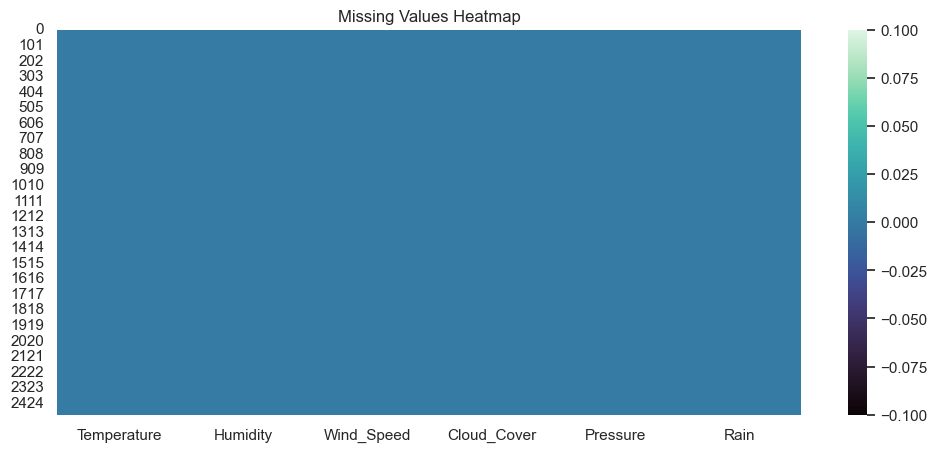

In [8]:
print("Total Missing Values:\n")
print(df.isnull().sum())

# Visualize
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=True, cmap="mako")
# cmap = ["viridis", "plasma", "inferno", "magma", "cividis", "rocket", "mako", "flare", "crest"]
plt.title("Missing Values Heatmap")
plt.show()

## Duplicate Rows

In [9]:
print("Duplicate Rows:", df.duplicated().sum())
df[df.duplicated()]

Duplicate Rows: 0


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain


## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_mod = sc.fit_transform(df)


In [ ]:
print(df_mod)

## Correlation Matrix

In [ ]:
df_mod = pd.DataFrame(df_mod)
df_mod.columns

## Assign Columns to a dataframe df_mod

In [11]:
df_mod.columns = ['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass']

NameError: name 'df_mod' is not defined

## Dataframe Head df_mod

In [ ]:
df_mod.head

## Correlation Matrix After Scaling

In [ ]:
corr = df_mod.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Summary Statistics

In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Temperature,2500.0,NaN,NaN,NaN,22.581725,7.326996,10.001842,16.359398,22.536448,28.976476,34.995214
Humidity,2500.0,NaN,NaN,NaN,64.347094,19.954739,30.005071,47.339815,63.920797,81.561021,99.997481
Wind_Speed,2500.0,NaN,NaN,NaN,9.906255,5.780316,0.009819,4.761909,9.908572,14.948408,19.999132
Cloud_Cover,2500.0,NaN,NaN,NaN,49.658104,29.123104,0.015038,23.900016,49.488284,75.32414,99.997795
Pressure,2500.0,NaN,NaN,NaN,1014.312336,20.196433,980.014486,996.93863,1013.433035,1031.735067,1049.985593
Rain,2500,2,no rain,2186,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Numerical vs Categorical Columns

In [13]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object','category']).columns

print("Numerical Columns:\n", num_cols)
print("\nCategorical Columns:\n", cat_cols)

Numerical Columns:
 Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure'], dtype='object')

Categorical Columns:
 Index(['Rain'], dtype='object')


## Univariate Analysis

### Numerical Features (Histogram + Boxplots)

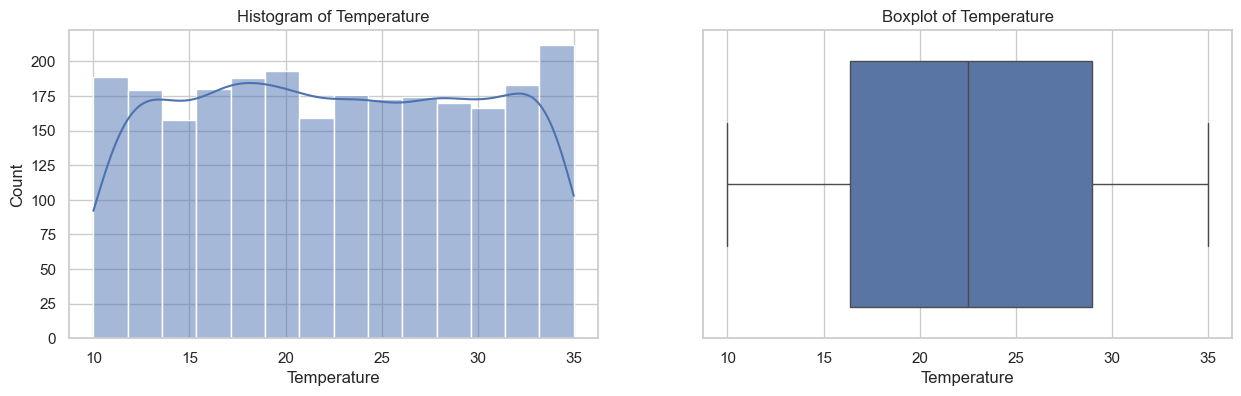

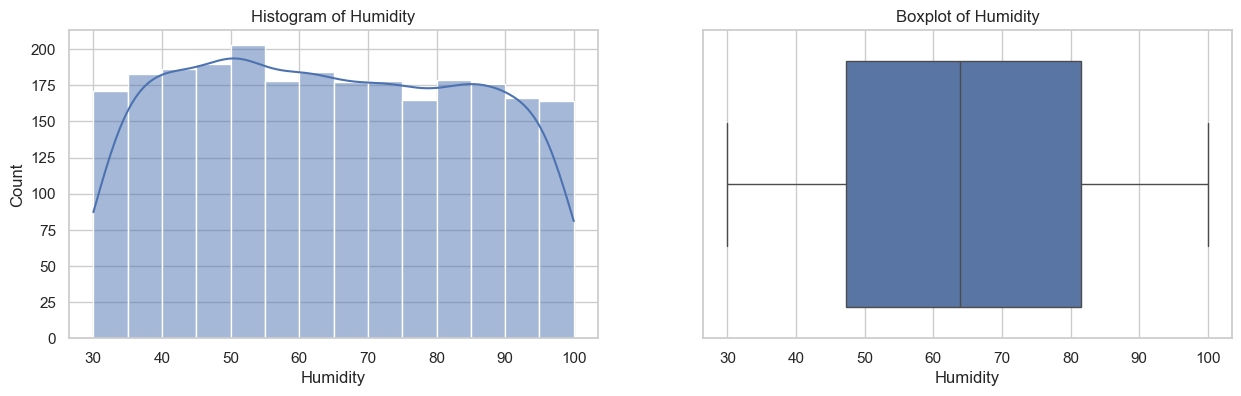

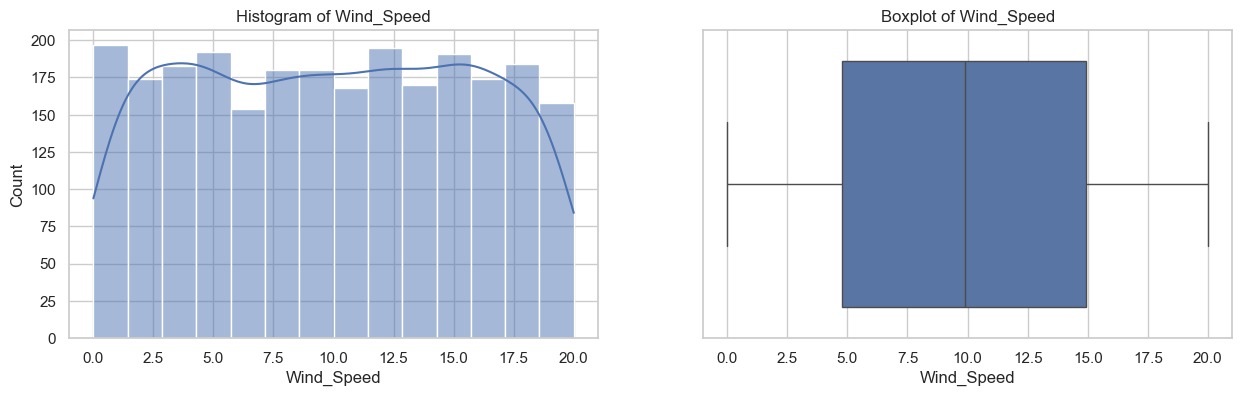

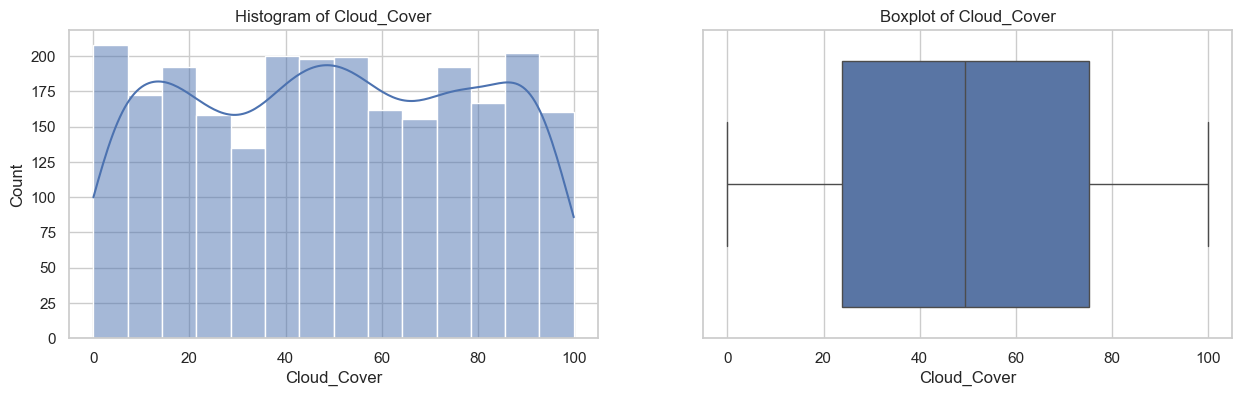

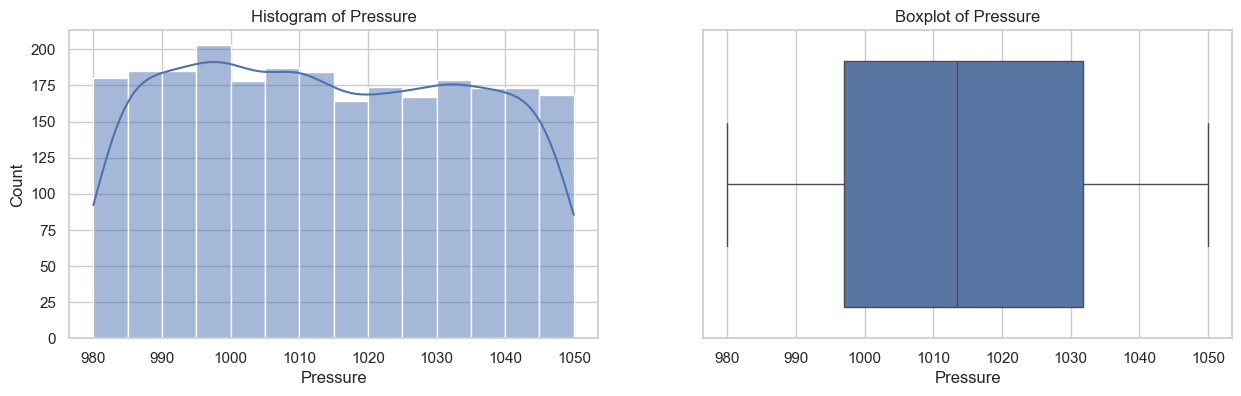

In [14]:
for col in num_cols:
    plt.figure(figsize=(15,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

### Categorical Features (Countplots)

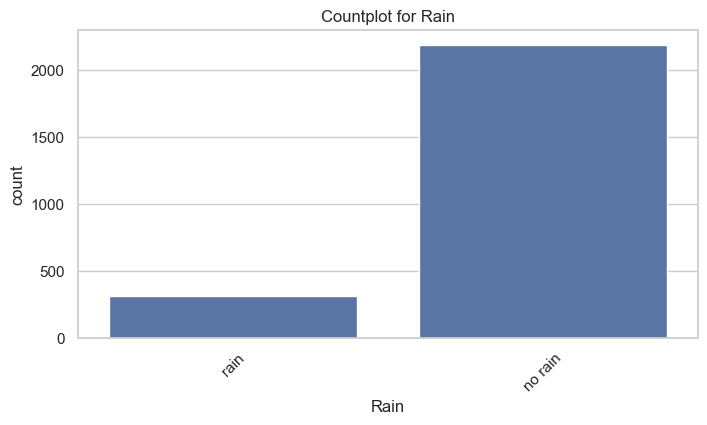

In [15]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col])
    plt.title(f"Countplot for {col}")
    plt.xticks(rotation=45)
    plt.show()

## Outlier Detection (Z-score or IQR)

In [16]:
outlier_cols = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    if len(outliers) > 0:
        outlier_cols.append(col)

print("Columns with outliers:", outlier_cols)

Columns with outliers: []


## Bivariate Analysis

### Numerical vs Numerical (Scatterplots)

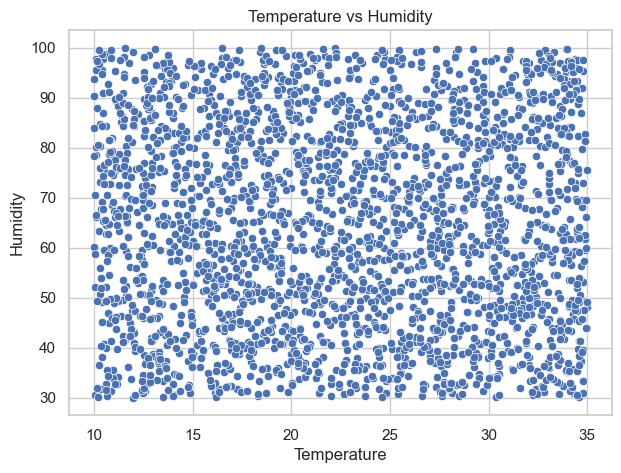

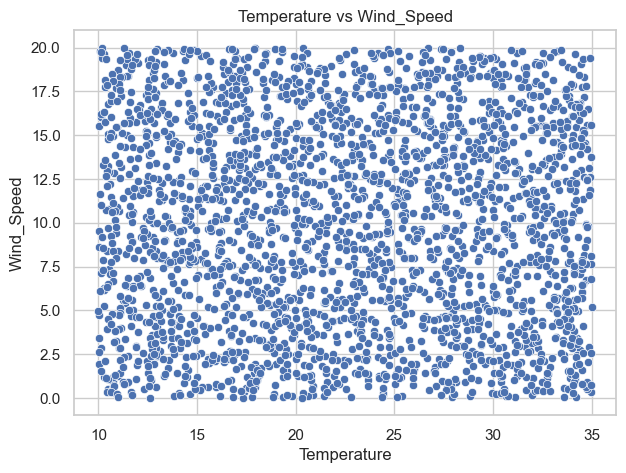

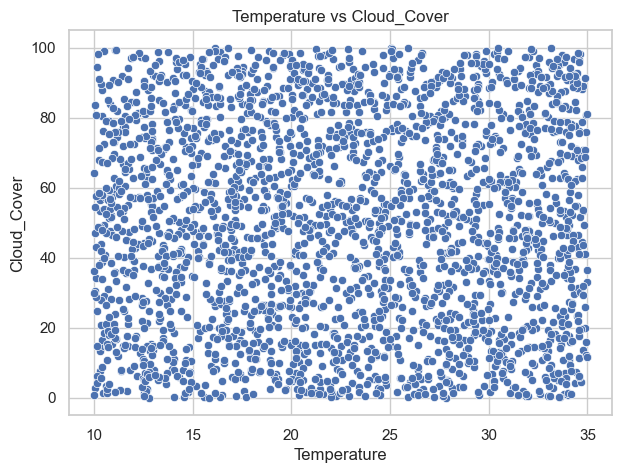

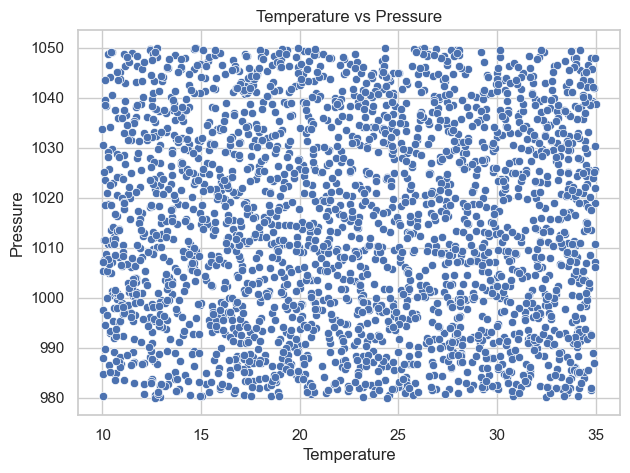

In [17]:
for col in num_cols:
    if col != num_cols[0]:  # Avoid self-scatter
        plt.figure(figsize=(7,5))
        sns.scatterplot(x=df[num_cols[0]], y=df[col])
        plt.title(f"{num_cols[0]} vs {col}")
        plt.show()

### Categorical vs Numerical

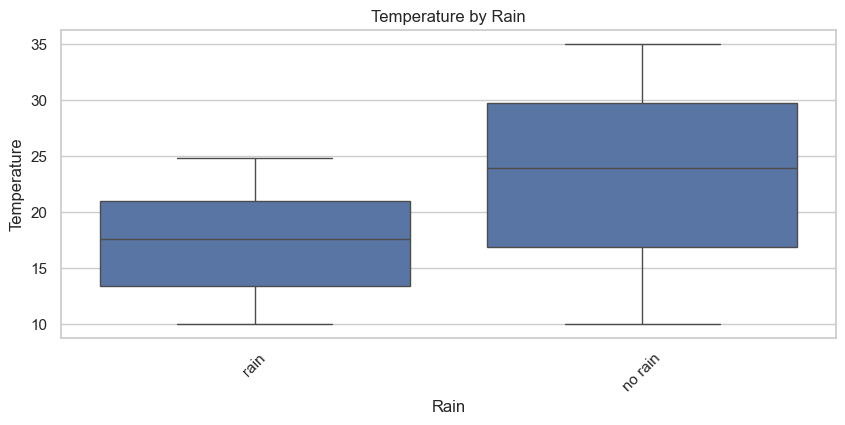

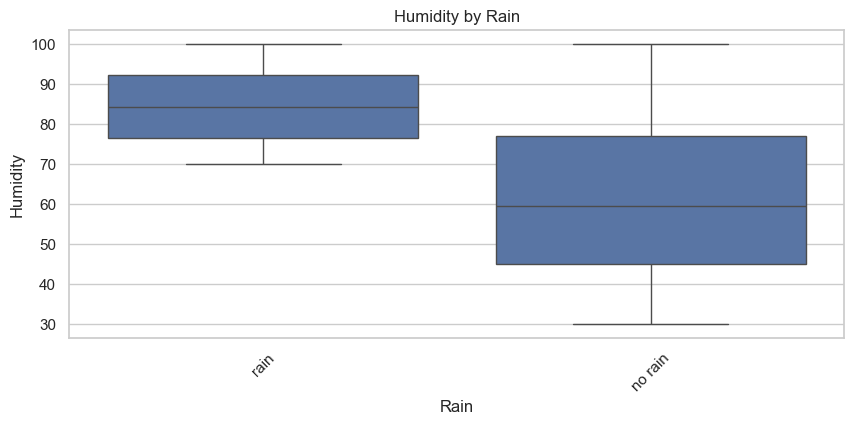

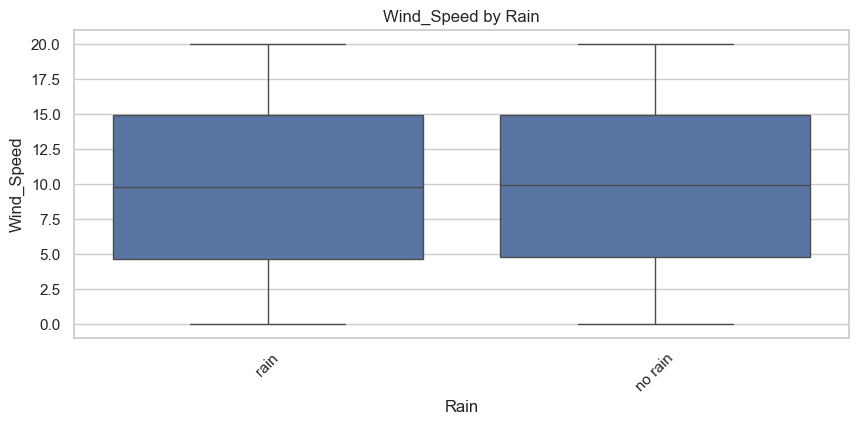

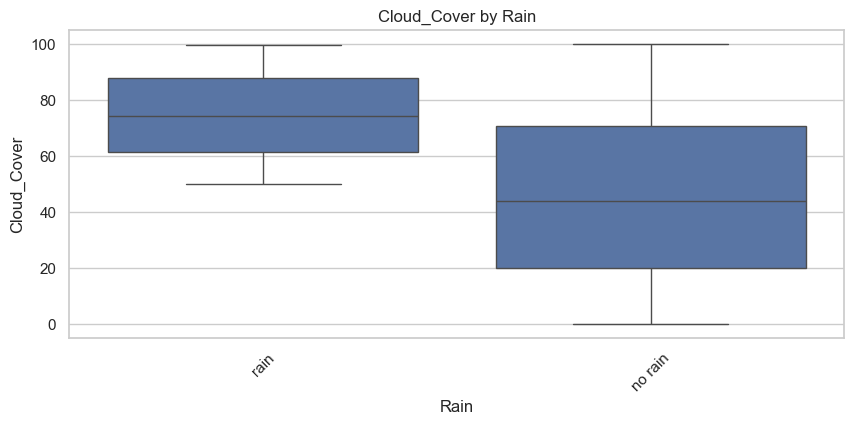

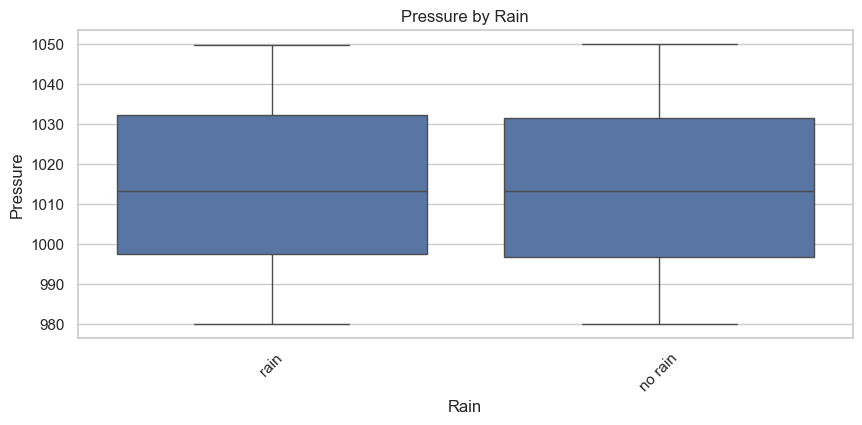

In [18]:
for col in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(10,4))
        sns.boxplot(x=df[col], y=df[num])
        plt.title(f"{num} by {col}")
        plt.xticks(rotation=45)
        plt.show()

## Correlation Analysis

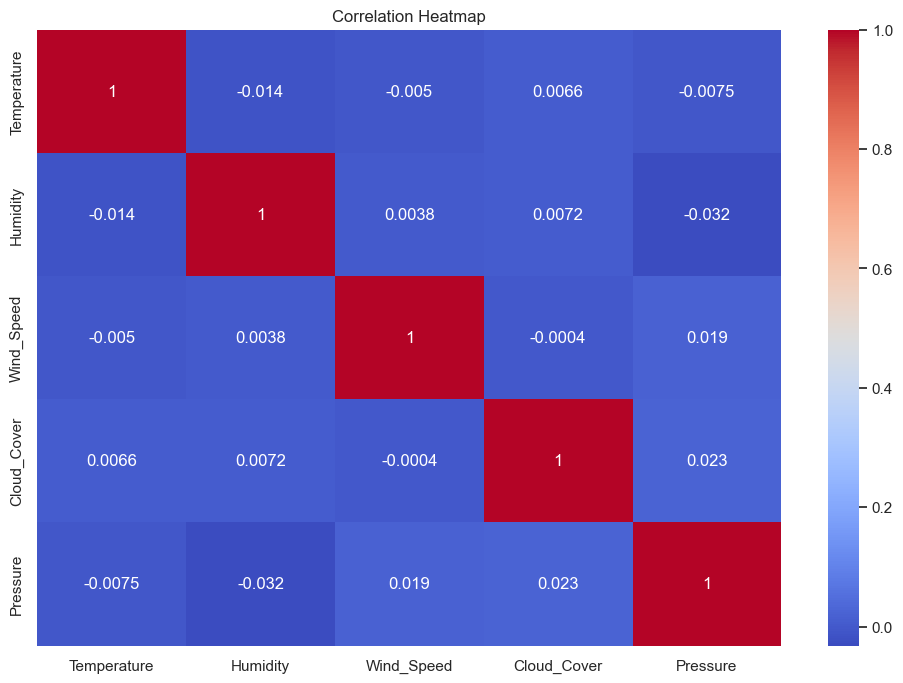

In [19]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Pairplot (Multivariate)

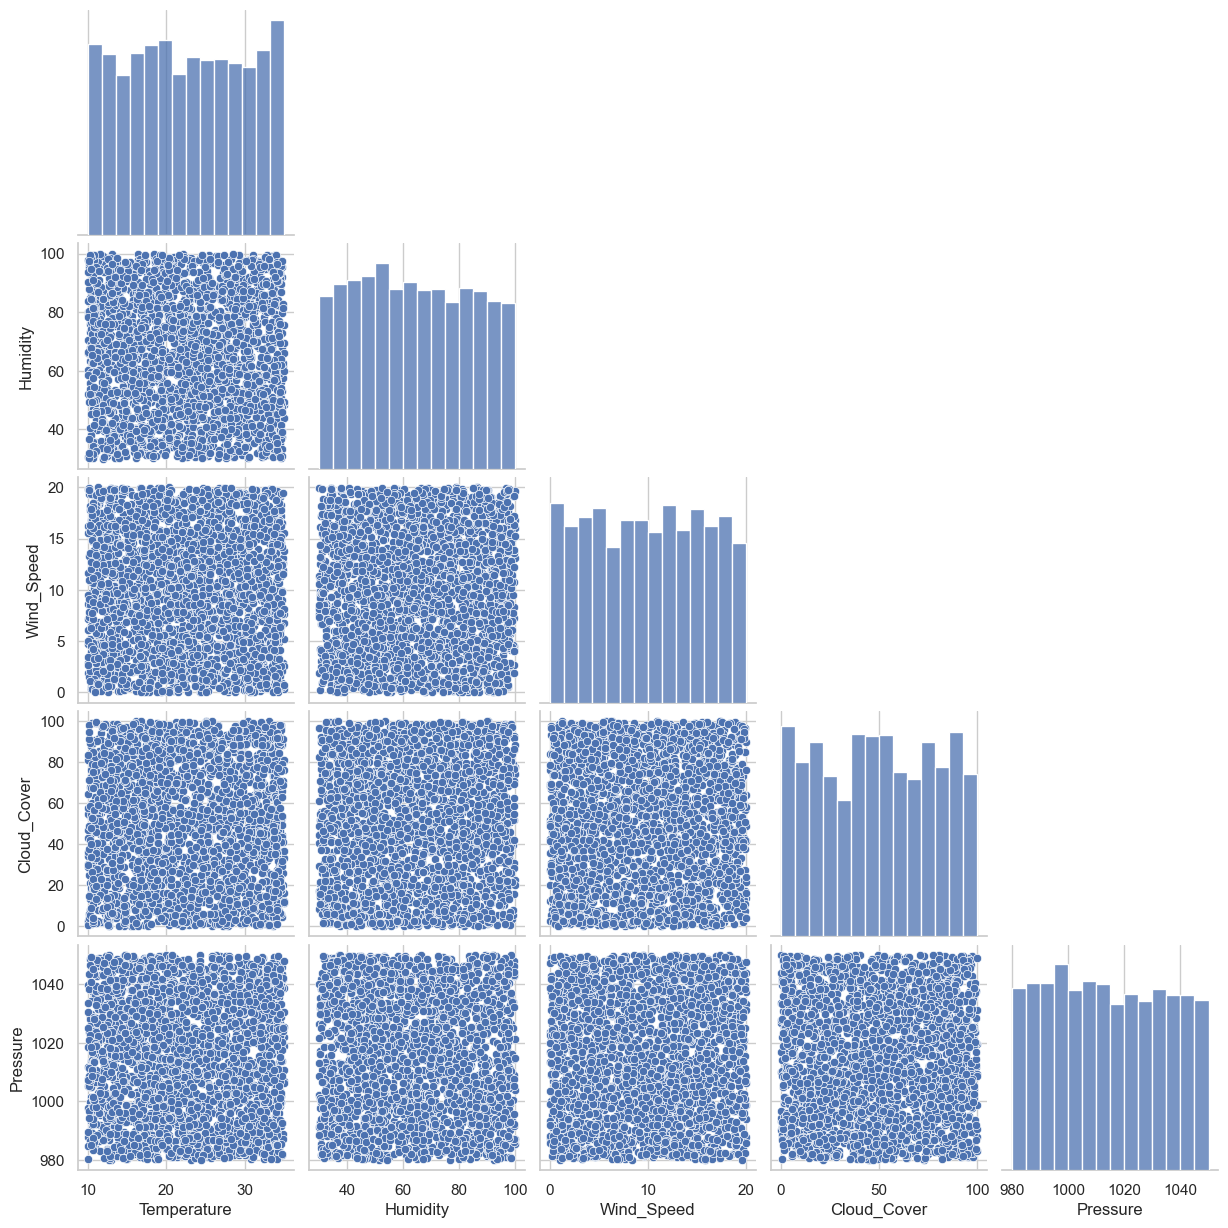

In [20]:
sns.pairplot(df[num_cols], corner=True)
plt.show()

## Skewness & Kurtosis

In [ ]:
for col in num_cols:
    print(f"{col}: Skewness={skew(df[col].dropna()):.2f}, Kurtosis={kurtosis(df[col].dropna()):.2f}")

## Target Variable Detection (Auto)

Detected Target Variable: Rain


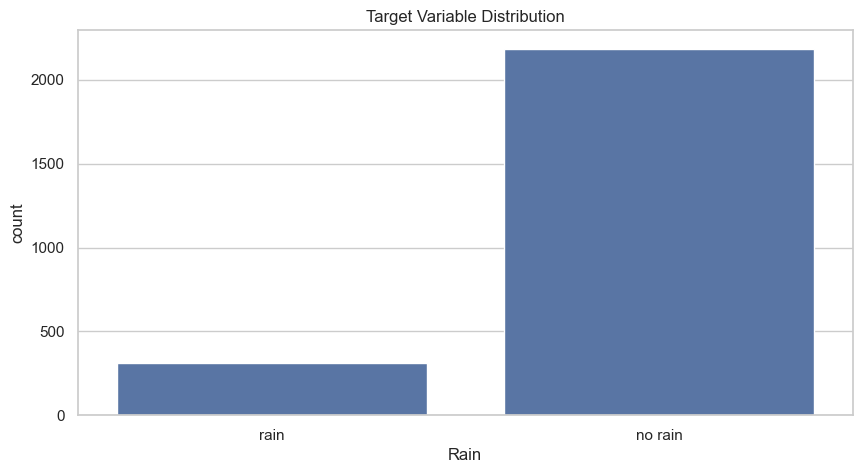

In [21]:
target = df.columns[-1]  # last column as target
print("Detected Target Variable:", target)

# Target distribution
sns.countplot(x=df[target])
plt.title("Target Variable Distribution")
plt.show()

## Taking Care of Missing Values

In [ ]:
df_clean = df.copy()

# Numerical imputation
for col in num_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Categorical imputation
for col in cat_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

## Save Cleaned Data

In [ ]:
df_clean.to_csv("cleaned_dataset.csv", index=False)
print("Dataset Saved as cleaned_dataset.csv")